### Just to see if there are subgroups that exhibit different behavior in the data

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1H7tFzEhiRoXbaxEyEknZpG4Frkky72QG') # 3cleaned_cyclical

# Please check preproccessing file of "clustering after preprocessing" for clusters after preprocessing.

- Different patterns and behaviors.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


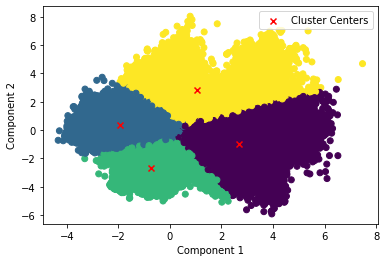

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Families vs couples vs singles

In [ ]:
def categorize_group_type(row):
    if row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'single'
    elif row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'couple'
    else:
        return 'family'

data['group_type'] = data.apply(categorize_group_type, axis=1)

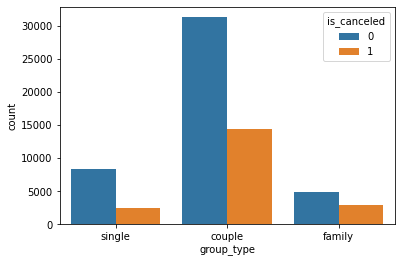

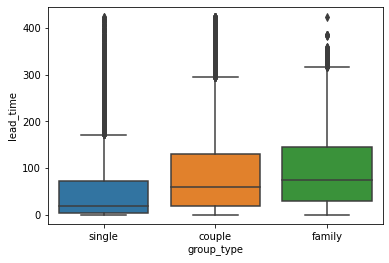

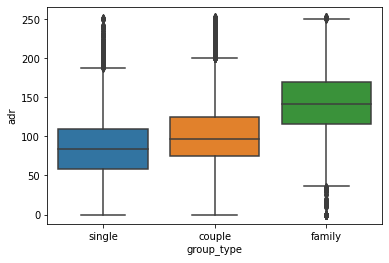

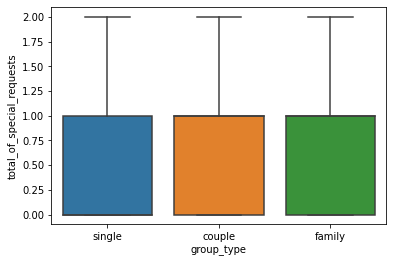

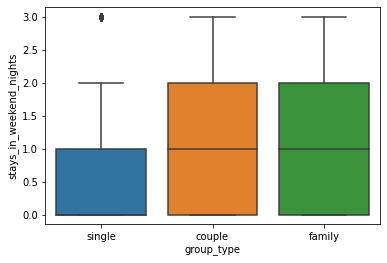

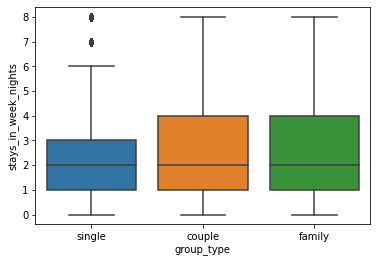

In [ ]:
sns.countplot(x='group_type', hue='is_canceled', data=data)
plt.show()

sns.boxplot(x='group_type', y='lead_time', data=data)
plt.show()

sns.boxplot(x='group_type', y='adr', data=data)
plt.show()

sns.boxplot(x='group_type', y='total_of_special_requests', data=data)
plt.show()

sns.boxplot(x='group_type', y='stays_in_weekend_nights', data=data)
plt.show()

sns.boxplot(x='group_type', y='stays_in_week_nights', data=data)
plt.show()

Cancellations are biased towards couples in the dataset. Other plots show differences between some key columns across group_types

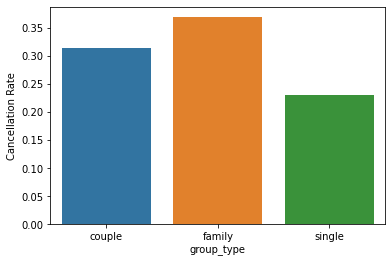

In [ ]:
group_cancellation_rate = data.groupby('group_type')['is_canceled'].mean()

sns.barplot(x=group_cancellation_rate.index, y=group_cancellation_rate.values)
plt.ylabel('Cancellation Rate')
plt.show()

# Other potential subgroups

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1fk1t6-RX5aO9pXNuRjhnCBib4PG2SH3W')

Analysis for market_segment:


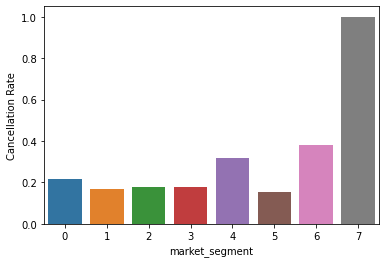

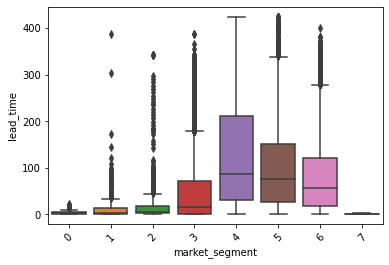

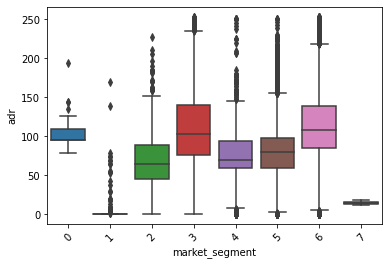

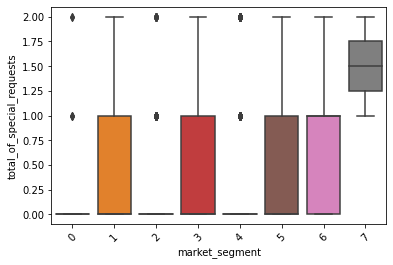

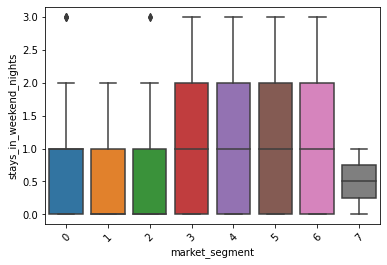

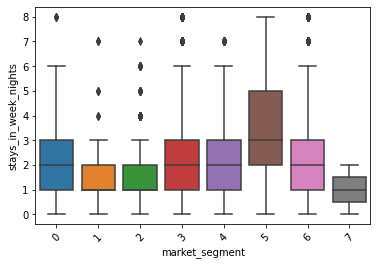

Analysis for distribution_channel:


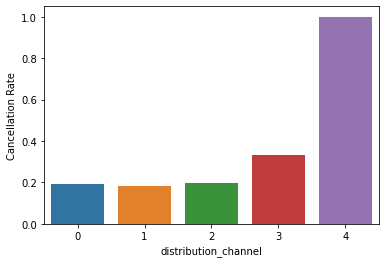

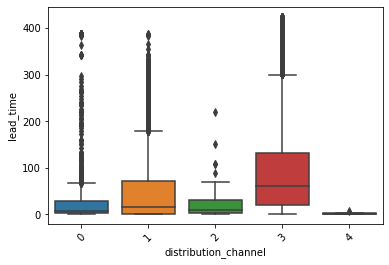

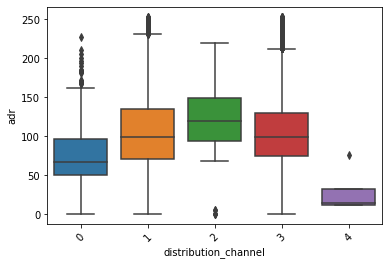

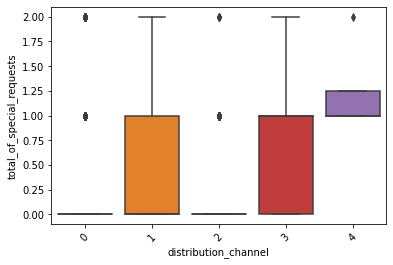

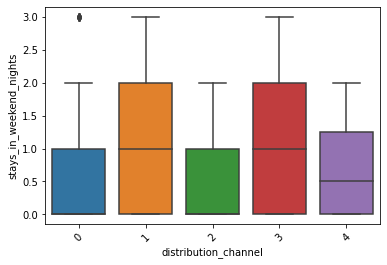

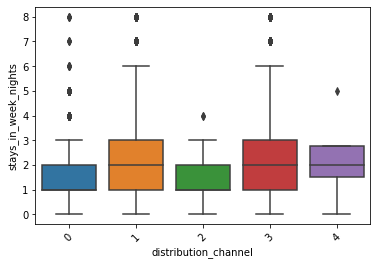

Analysis for customer_type:


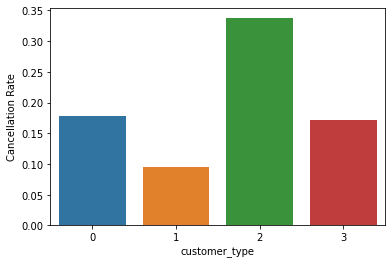

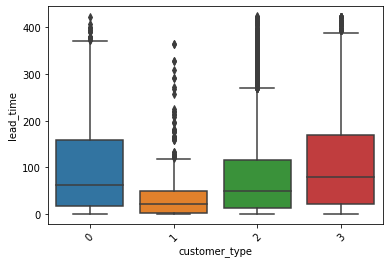

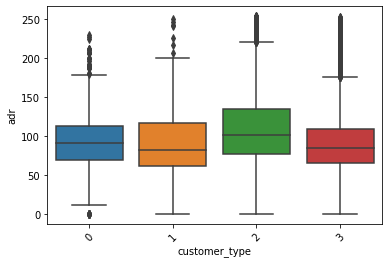

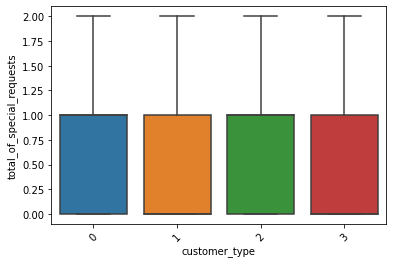

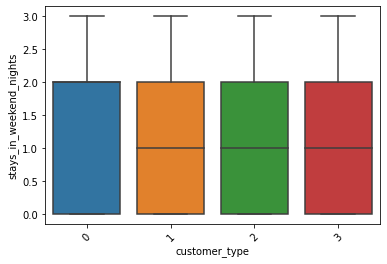

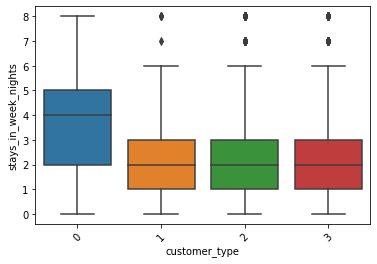

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_analyze = ['is_canceled', 'lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']
subgroups = ['market_segment', 'distribution_channel', 'customer_type']

data_copy = data.copy()
for subgroup in subgroups:
    if data_copy[subgroup].dtype not in ['int64', 'float64']:
        le = LabelEncoder()
        data_copy[subgroup] = le.fit_transform(data_copy[subgroup])

for subgroup in subgroups:
    print(f'Analysis for {subgroup}:')
    for column in columns_to_analyze:
        if column == 'is_canceled':
            cancellation_rate = data_copy.groupby(subgroup)['is_canceled'].mean()
            sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values)
            plt.ylabel('Cancellation Rate')
            plt.show()
        else:
            sns.boxplot(x=subgroup, y=column, data=data_copy)
            plt.xticks(rotation=45)
            plt.show()

Analysis for country:


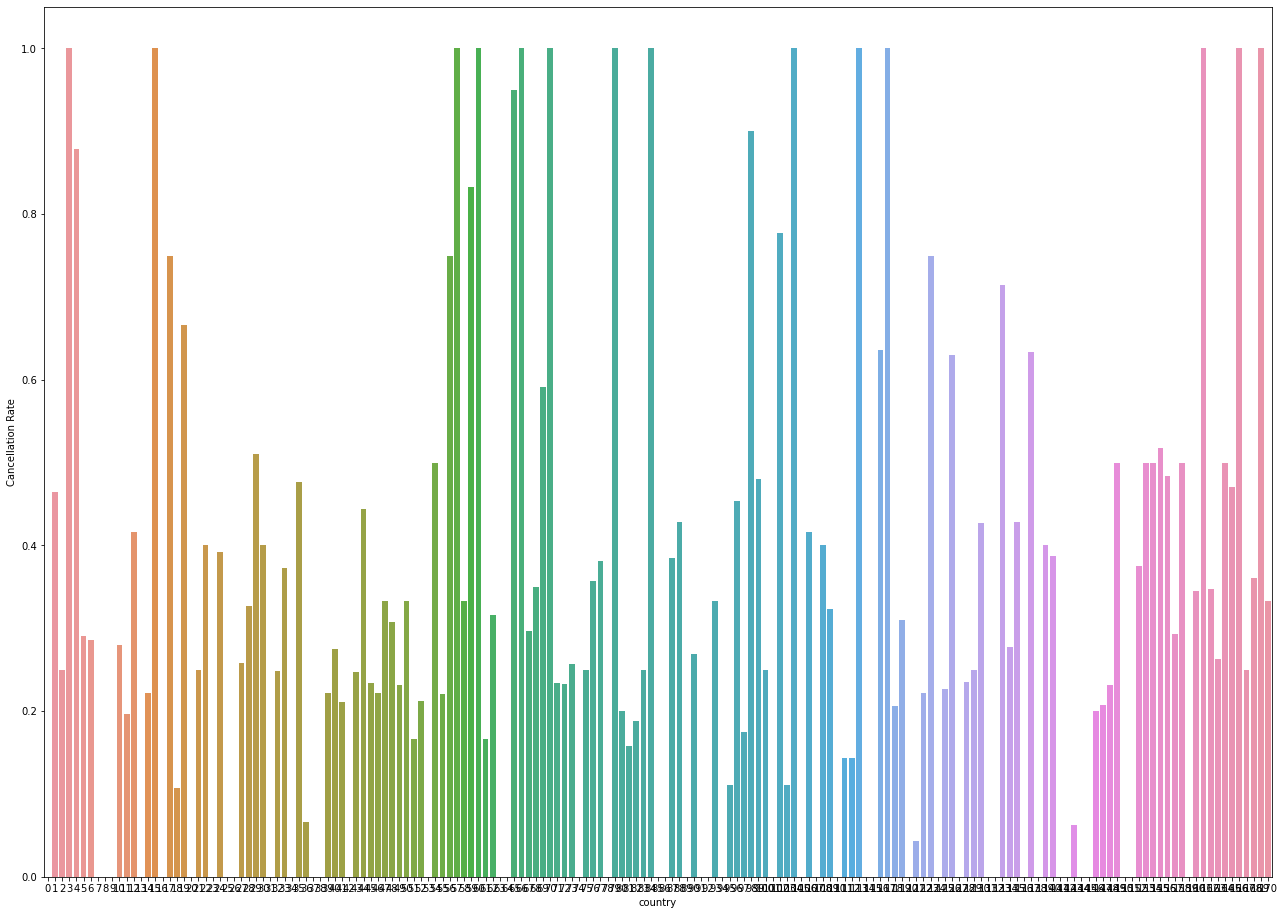

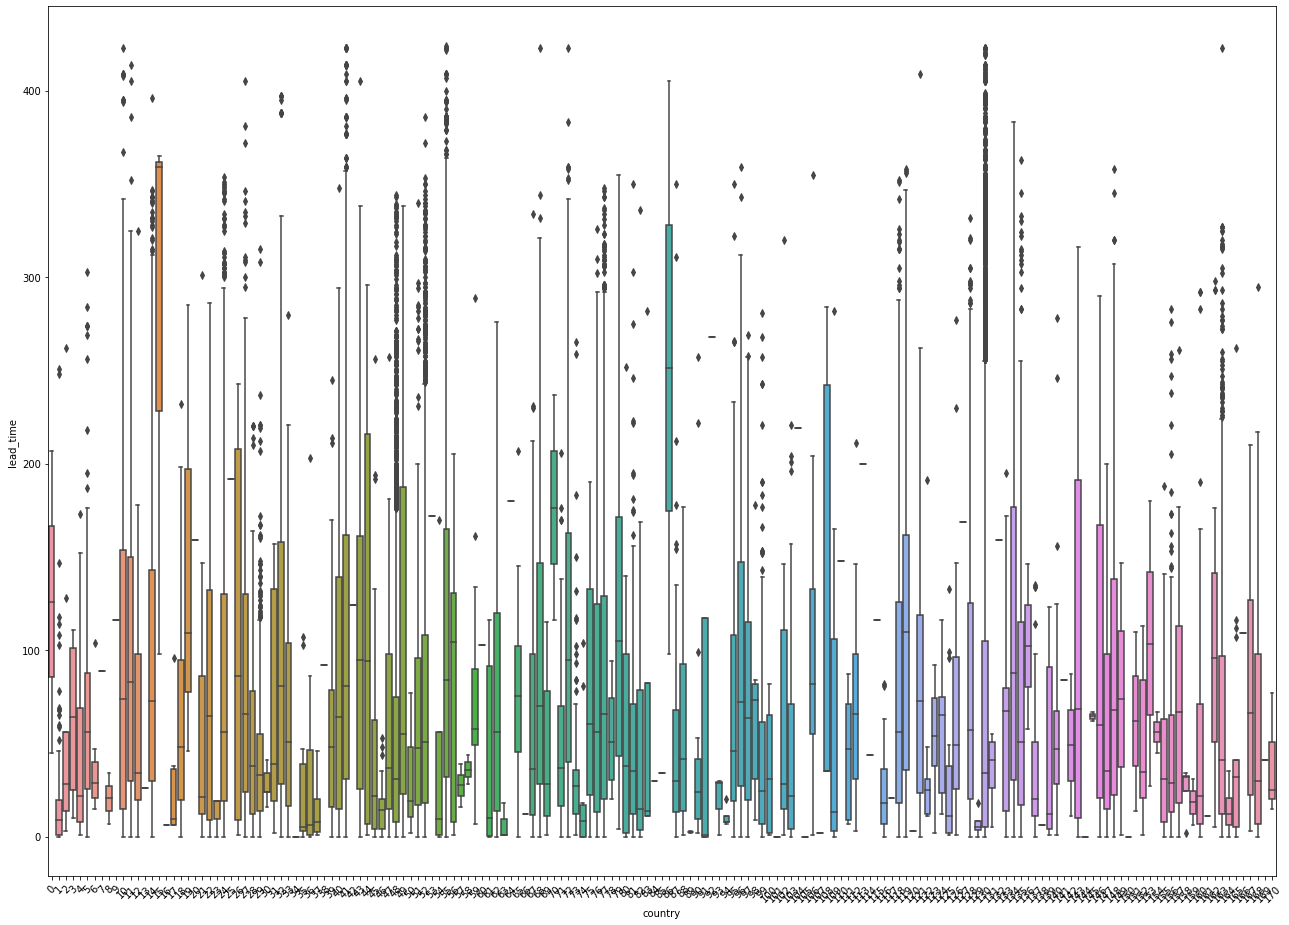

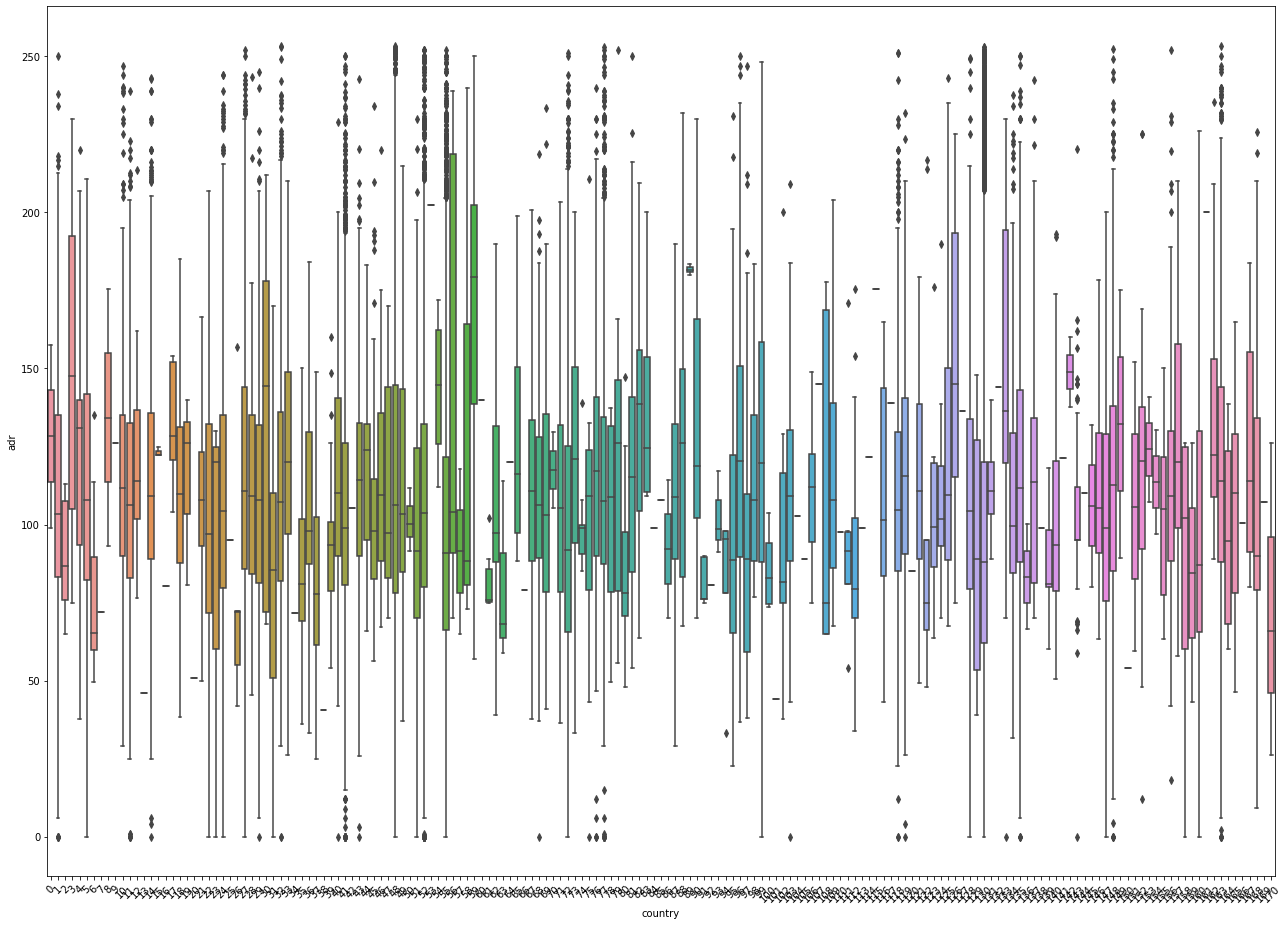

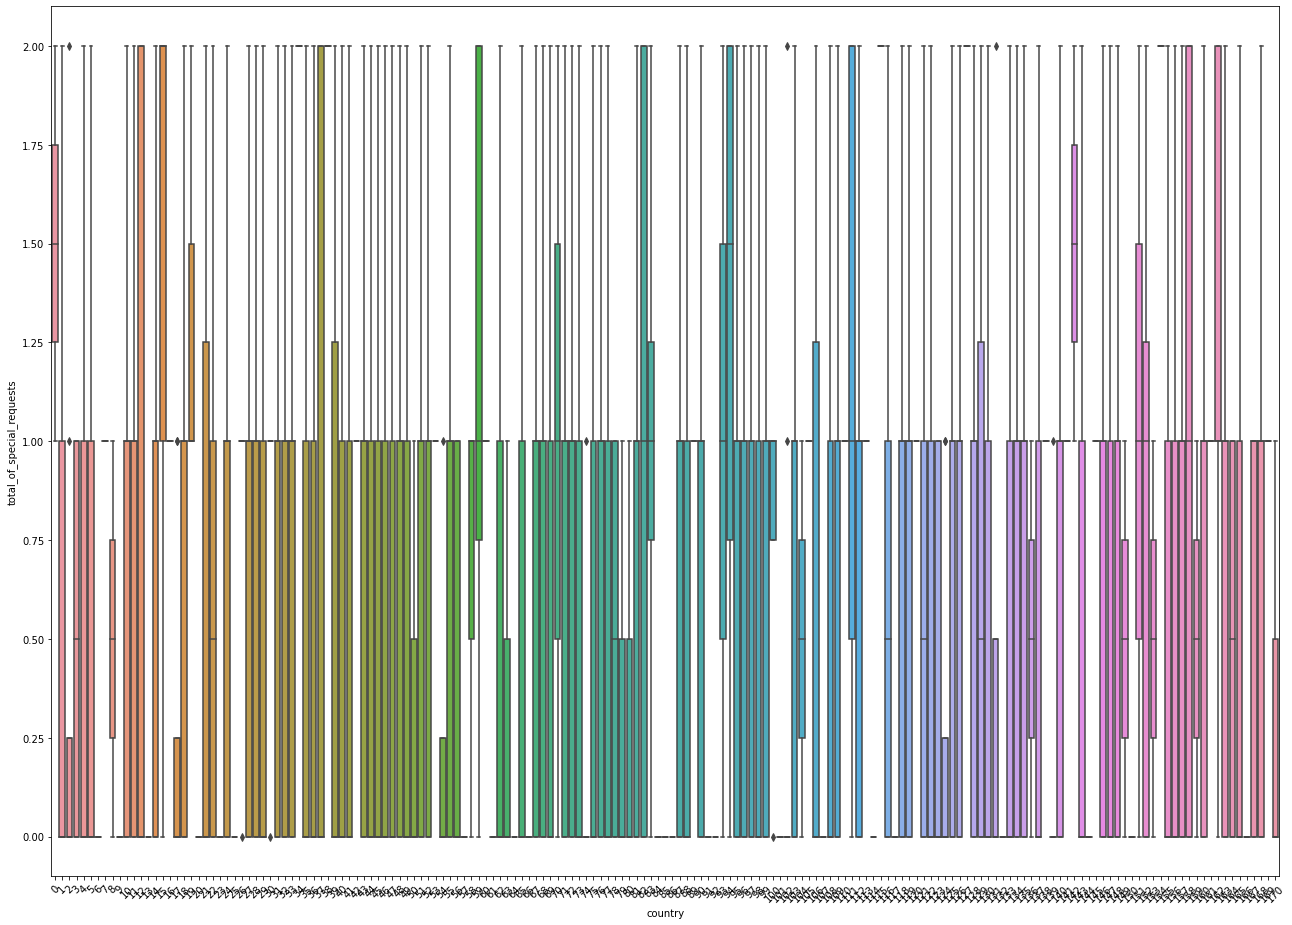

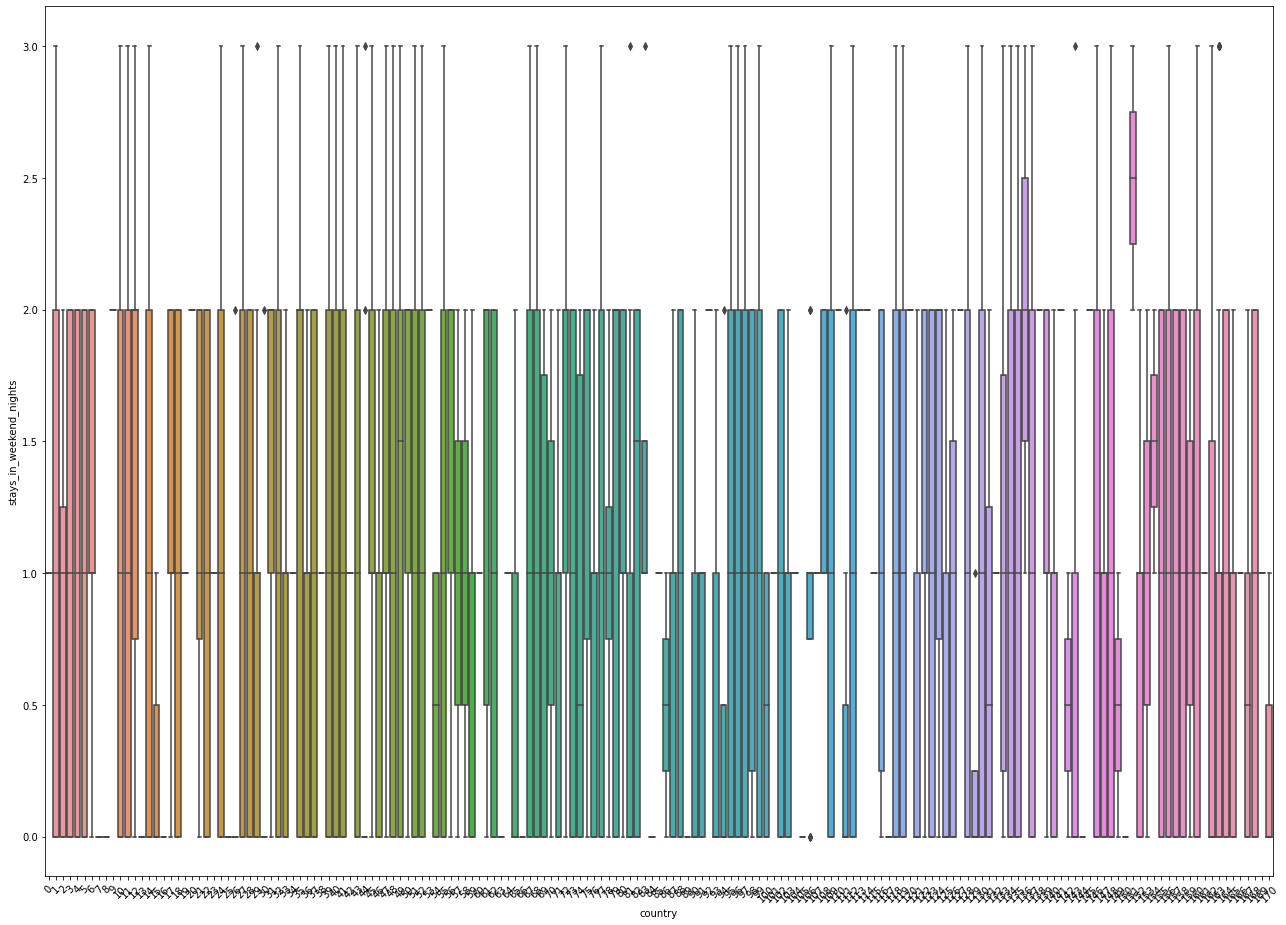

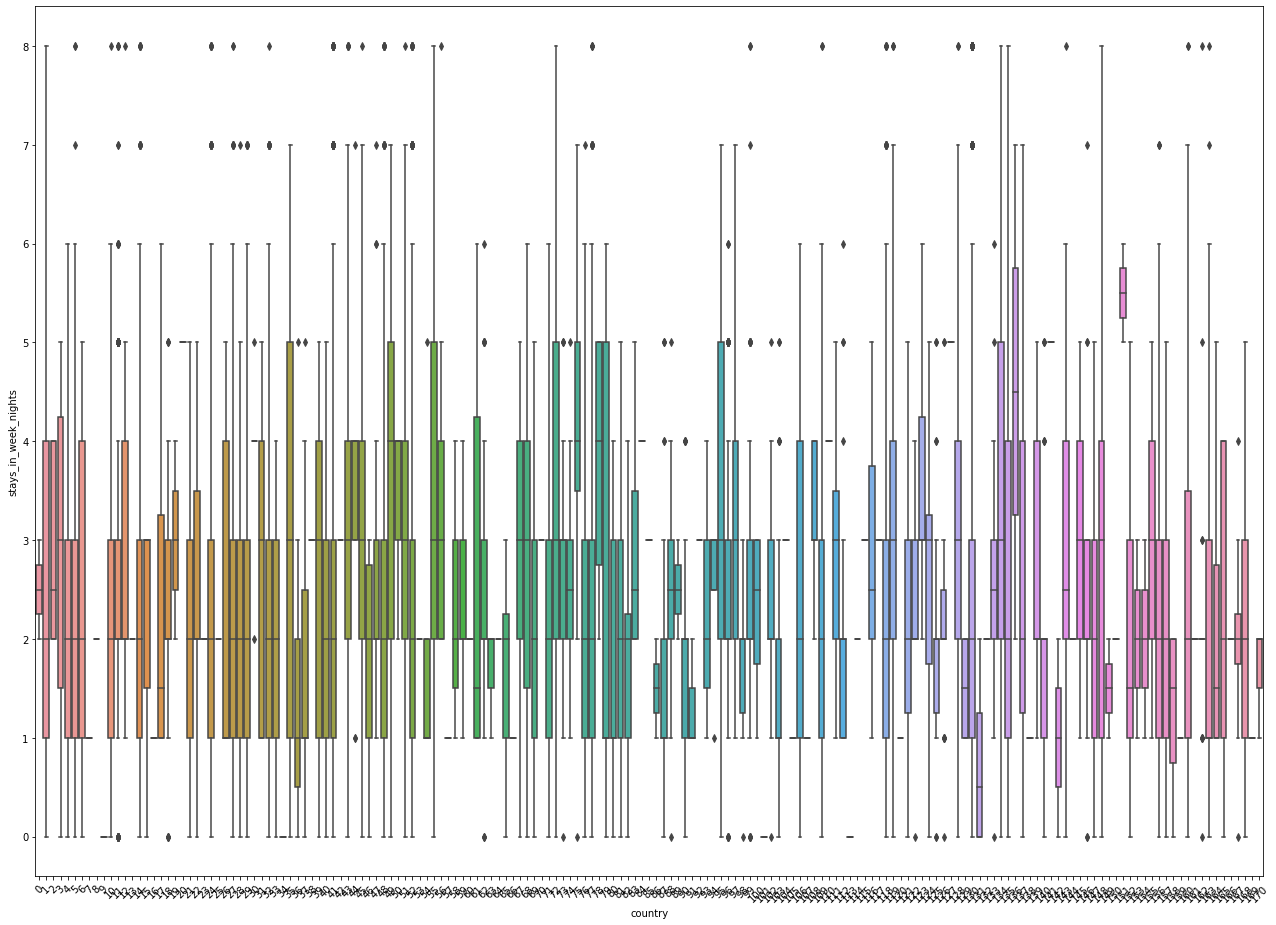

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_analyze = ['is_canceled', 'lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']
subgroups = ['country']

figsize = (22, 16) # change this when uploading to slides

data_copy = data.copy()
for subgroup in subgroups:
    if data_copy[subgroup].dtype not in ['int64', 'float64']:
        le = LabelEncoder()
        data_copy[subgroup] = le.fit_transform(data_copy[subgroup])

for subgroup in subgroups:
    print(f'Analysis for {subgroup}:')
    for column in columns_to_analyze:
        if column == 'is_canceled':
            cancellation_rate = data_copy.groupby(subgroup)['is_canceled'].mean()
            plt.figure(figsize=figsize)
            sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values)
            plt.ylabel('Cancellation Rate')
            plt.show()
        else:
            plt.figure(figsize=figsize)
            sns.boxplot(x=subgroup, y=column, data=data_copy)
            plt.xticks(rotation=45)
            plt.show()

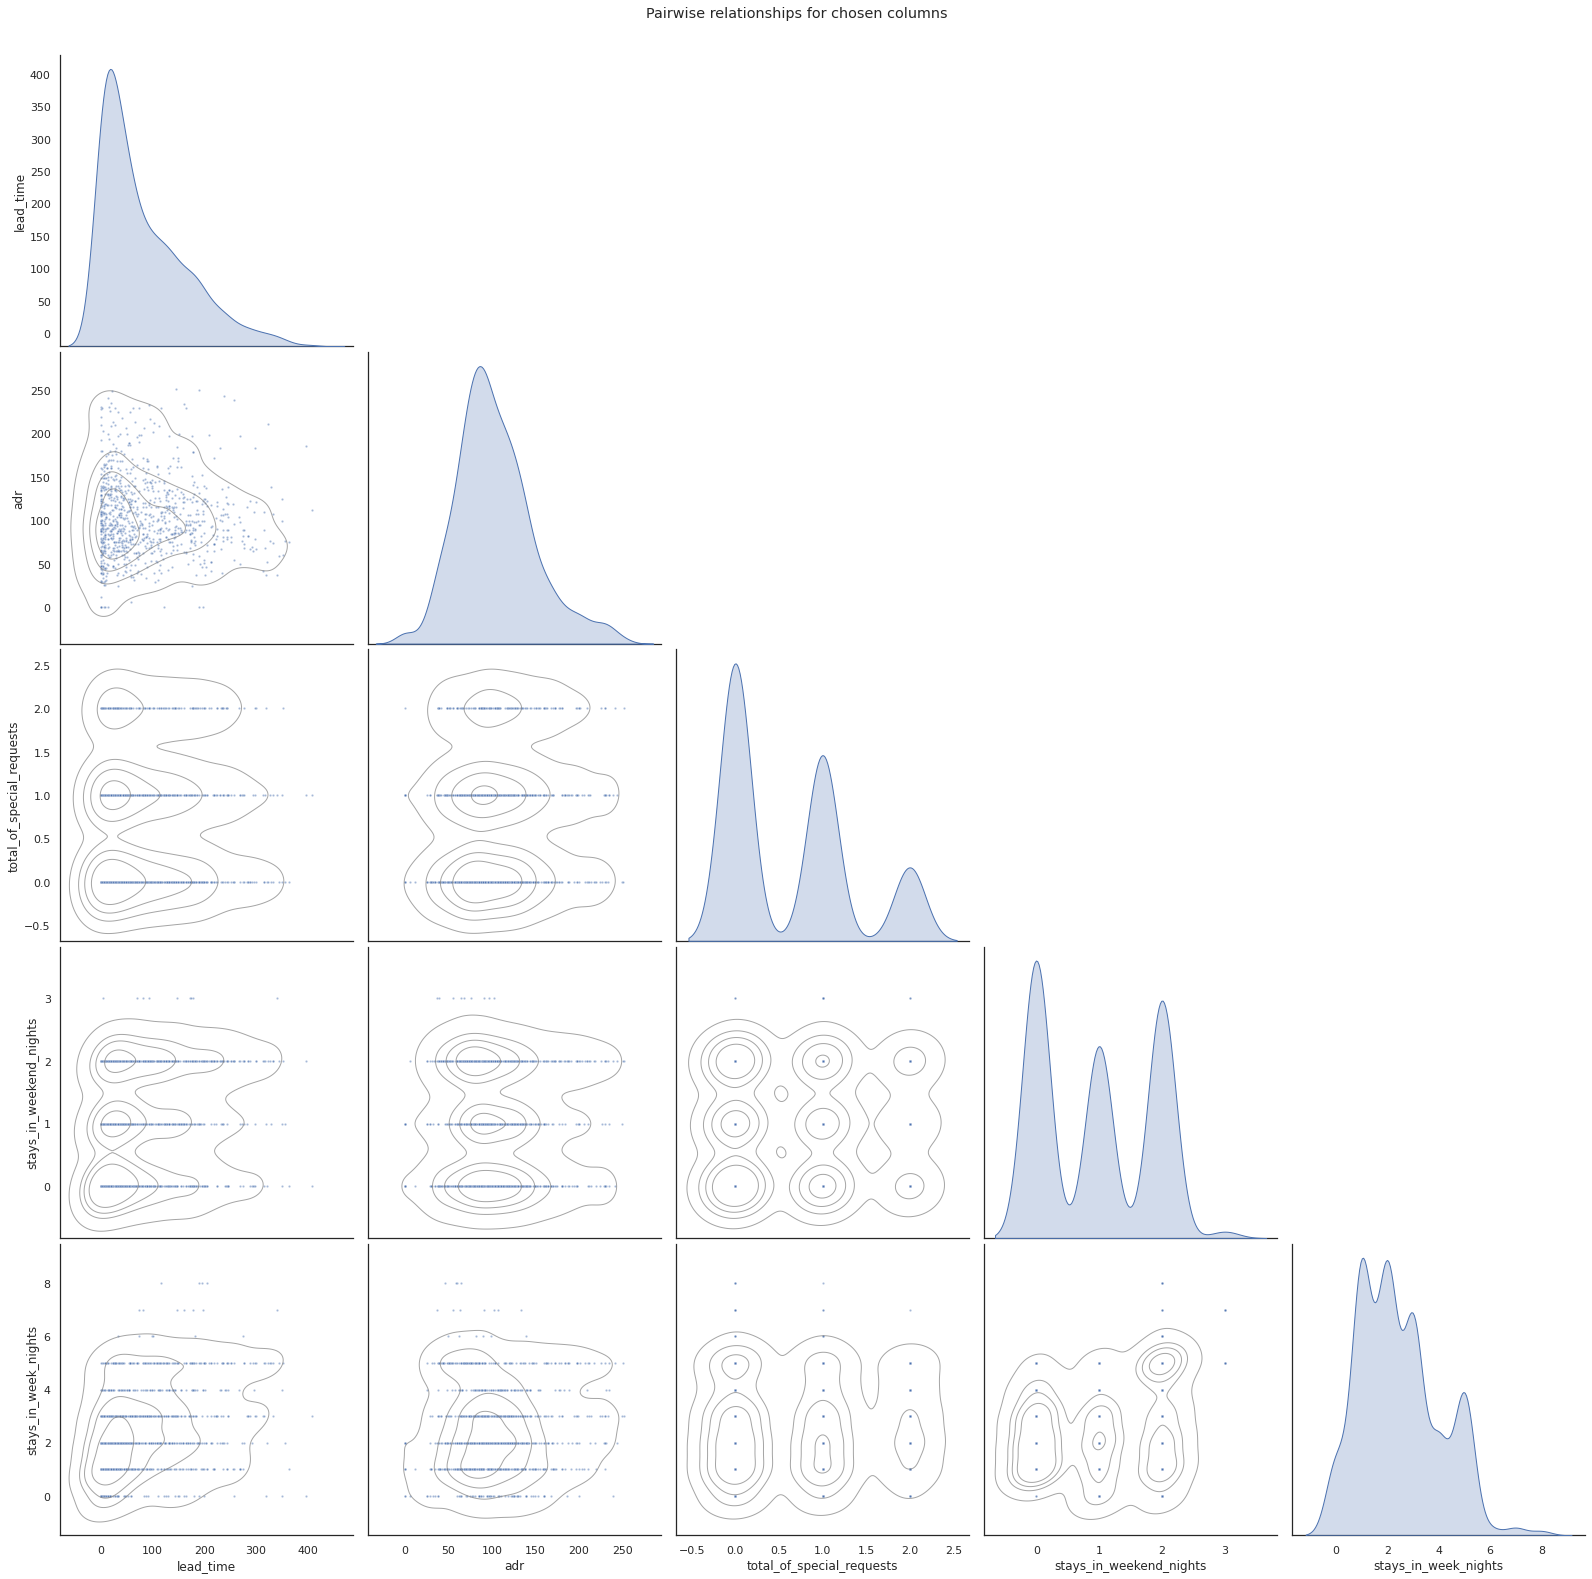

In [ ]:
import numpy as np


relevant_columns = ['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']

sns.set(style='white', font_scale=1)
pairplot = sns.pairplot(data[relevant_columns].sample(1000), diag_kind='kde', markers='.', height=4.5, plot_kws={'s': 20, 'alpha': 0.5})
pairplot.map_lower(sns.kdeplot, levels=5, color=".5", linewidths=1, alpha=.7)

for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
    pairplot.axes[i, j].set_visible(False)

plt.subplots_adjust(top=0.95)
pairplot.fig.suptitle('Pairwise relationships for chosen columns')

plt.show()